In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from pprint import pprint
import time
from scipy.stats import linregress
import reverse_geocoder as rg
import glob

In [3]:
# Load in csv 
all_earthquakes = pd.read_csv("earthquake_data_1980-2020.csv")
all_earthquakes.head()

,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year
0,12.353,95.192,20.0,5.1,400,"Andaman Islands, India region",1980-01-01 01:24:37.200,1,1,1980
1,27.261,60.259,33.0,5.3,432,southeastern Iran,1980-01-01 02:45:54.000,1,1,1980
2,-31.211,58.717,10.0,5.0,385,Southwest Indian Ridge,1980-01-01 16:41:45.700,1,1,1980
3,38.815,-27.780,10.0,6.7,691,"Azores Islands, Portugal",1980-01-01 16:42:40.000,1,1,1980
4,3.491,126.716,54.0,5.0,385,"Kepulauan Talaud, Indonesia",1980-01-01 19:19:05.900,1,1,1980


In [4]:
moderate_earthquakes = pd.read_csv("output_data2/earthquake_mag_5to6.csv")
strong_earthquakes = pd.read_csv("output_data2/earthquake_mag_6to7.csv")
vstrong_earthquakes = pd.read_csv("output_data2/earthquake_mag_above_7.csv")



The correlation between Magnitude and Significance is 0.85


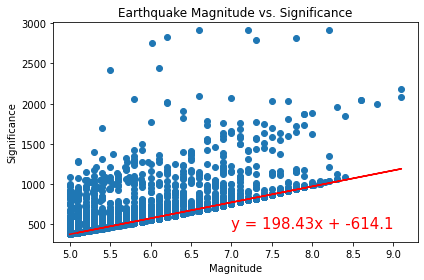

In [17]:
x_values = all_earthquakes['Mag']
y_values = all_earthquakes['Sig']

# Add trendline to fit the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# calculate correlation
correlation = st.pearsonr(all_earthquakes.Mag, all_earthquakes.Sig)
print(f"The correlation between Magnitude and Significance is {rvalue.round(2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(7, 450), fontsize=15, color="red")
plt.title("Earthquake Magnitude vs. Significance")
plt.xlabel("Magnitude")
plt.ylabel("Significance")
plt.xlim(min(all_earthquakes['Mag'])-0.2, max(all_earthquakes['Mag'])+0.2)
plt.ylim(min(all_earthquakes['Sig'])-100, max(all_earthquakes['Sig'])+100)

plt.savefig("images/Mag_vs_Sig.png")
plt.tight_layout()
plt.show()

The correlation between Magnitude and Significance is 0.04


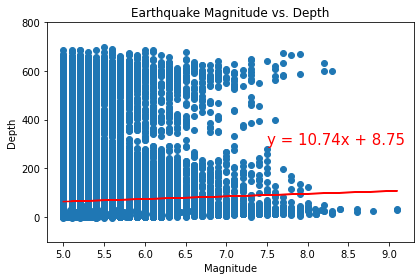

In [24]:
x_values = all_earthquakes['Mag']
y_values = all_earthquakes['Depth']

# Add trendline to fit the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# calculate correlation
correlation = st.pearsonr(all_earthquakes.Mag, all_earthquakes.Depth)
print(f"The correlation between Magnitude and Significance is {rvalue.round(2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(7.5, 300), fontsize=15, color="red")
plt.title("Earthquake Magnitude vs. Depth")
plt.xlabel("Magnitude")
plt.ylabel("Depth")
plt.xlim(min(all_earthquakes['Mag'])-0.2, max(all_earthquakes['Mag'])+0.2)
plt.ylim(min(all_earthquakes['Depth'])-100, max(all_earthquakes['Depth'])+100)

plt.savefig("images/Mag_vs_Depth.png")
plt.tight_layout()
plt.show()